In [1]:
#develop by Meisam Kargar
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [66]:
# Import necessary libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel (r'C:\\Users\\meisam\\Desktop\\reveie.xlsx')

NameError: name 'pd' is not defined

In [68]:
# Import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [69]:
# Lower casing and removing punctuations
df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for
x in str(x).split()))
df['review'] = df['review'].str.replace('[^\w\s]',"")
df.review.head(5)

C:\Users\meisam\AppData\Local\Temp/ipykernel_1552/3590215782.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('[^\w\s]',"")


0    harvard is one of the most prestigious univers...
1    one of the most famous good teaching method an...
2    a most it is a place you should visit if you g...
3    very nice campus i especially like the tour i ...
4    great institution no matter where you walk to ...
Name: review, dtype: object

In [70]:
# Removal of stop words
stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: " ".join(x for x in
str(x).split() if x not in stop))
df.review.head(5)

0    harvard one prestigious universities world eve...
1    one famous good teaching method high class uni...
2    place visit go boston course take tour great p...
3    nice campus especially like tour years ago vis...
4    great institution matter walk youll see someth...
Name: review, dtype: object

In [74]:
# # Lemmatization
# df['review'] = df['# Wordcloud function's input needs to be a single string of text.
# # Here I'm concatenating all Summaries into a single string.
# # similarly you can build for Text column
# reviews_str = reviews_sample.Summary.str.cat()
# wordcloud = WordCloud(background_color = 'white').generate(reviews_str)
# plt.figure(figsize=(10,10))
# plt.imshow(wordcloud,interpolation='bilinear')
# plt.axis("off")
# plt.show()'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()])
# df.review.head(5)

In [75]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df
# Dropping null values
reviews.dropna(inplace=True)

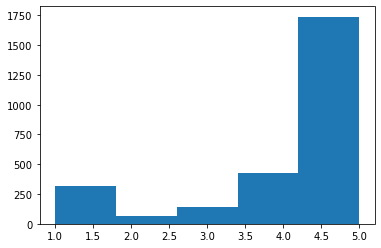

star
1.0     318
2.0      66
3.0     139
4.0     423
5.0    1739
Name: Id, dtype: int64


In [76]:
# The histogram reveals this dataset is highly unbalanced towards high rating.
reviews.star.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('star').count().Id)

In [77]:
# To make it balanced data, we sampled each score by the lowest n-count from above. (i.e. 29743 reviews scored as '2')
score_1 = reviews[reviews['star'] == 1].sample(n=66)
score_2 = reviews[reviews['star'] == 2].sample(n=66)
score_3 = reviews[reviews['star'] == 3].sample(n=66)
score_4 = reviews[reviews['star'] == 4].sample(n=66)
score_5 = reviews[reviews['star'] == 5].sample(n=66)

In [78]:
# Here we recreate a 'balanced' dataset.
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,
score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [79]:
# Printing count by 'Score' to check dataset is now balanced.
print(reviews_sample.groupby('star').count().Id)

star
1.0    66
2.0    66
3.0    66
4.0    66
5.0    66
Name: Id, dtype: int64


In [80]:
# Let's build a word cloud looking at the 'Summary' text
from wordcloud import WordCloud
from wordcloud import STOPWORDS

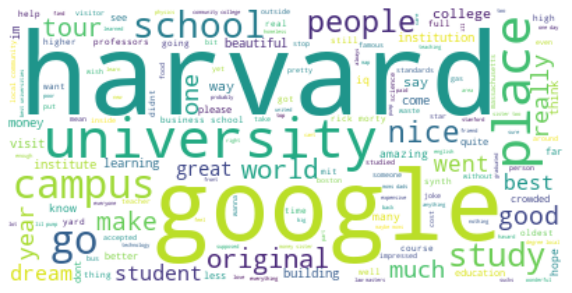

In [81]:
# Wordcloud function's input needs to be a single string of text.
# Here I'm concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.review.str.cat()
wordcloud = WordCloud(background_color = 'white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.
negative_reviews = reviews_sample[reviews_sample['star'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['star'].isin([4,5])]
# Transform to single string
negative_reviews_str = negative_reviews.review.str.cat()
positive_reviews_str = positive_reviews.review.str.cat()

In [83]:
# Create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

Text(0.5, 1.0, 'Reviews with Negative Scores')

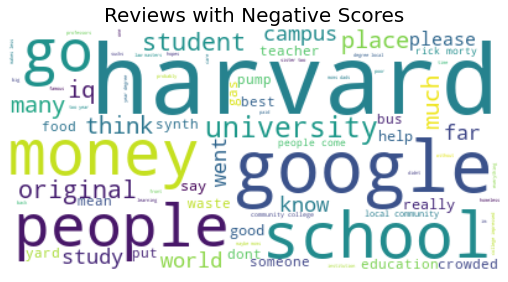

In [84]:
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

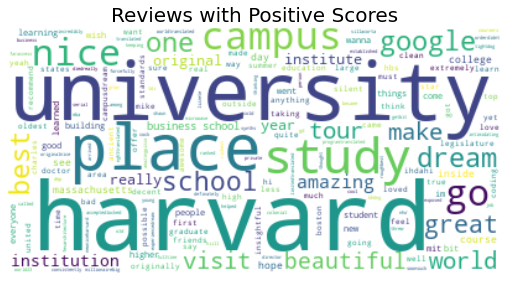

In [85]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [86]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

In [87]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\meisam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [88]:
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [89]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['review']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [90]:
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(5)

,neg,neu,pos,compound
0,0.00,0.606,0.394,0.8555
1,0.00,0.646,0.354,0.9136
2,0.00,0.578,0.422,0.9134
3,0.06,0.685,0.255,0.7264
4,0.00,0.654,0.346,0.8625


In [91]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,title,star,review,neg,neu,pos,compound
0,0,Salim Khoso,5.0,harvard one prestigious universities world eve...,0.0,0.606,0.394,0.8555
1,1,Soe Thiha,5.0,one famous good teaching method high class uni...,0.0,0.646,0.354,0.9136
2,2,Jennifer Schell,5.0,place visit go boston course take tour great p...,0.0,0.578,0.422,0.9134


In [92]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive', 'Negative')
df_c.head()


,Id,title,star,review,neg,neu,pos,compound,Sentiment
0,0,Salim Khoso,5.0,harvard one prestigious universities world eve...,0.00,0.606,0.394,0.8555,Positive
1,1,Soe Thiha,5.0,one famous good teaching method high class uni...,0.00,0.646,0.354,0.9136,Positive
2,2,Jennifer Schell,5.0,place visit go boston course take tour great p...,0.00,0.578,0.422,0.9134,Positive
3,3,John Z,5.0,nice campus especially like tour years ago vis...,0.06,0.685,0.255,0.7264,Positive
4,4,Daniel Duran,5.0,great institution matter walk youll see someth...,0.00,0.654,0.346,0.8625,Positive


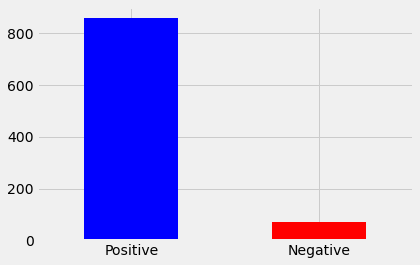

In [32]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0,color= ["b", "r"]);

In [33]:
df_c.to_csv('C:\\Users\\meisam\\Desktop\\تحلیل احساسات.csv')

In [1]:
# Import various layers needed for the architecture from keras
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
# The Input layer 
sequence_input = Input(shape=(30,), dtype='int32')
# Inputs passed to the embedding layer
embedding_sequences = embedding_layer(sequence_input)
# dropout and conv layer 
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
# Passed on to the LSTM layer
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
# Passed on to activation layer to get final output
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

ModuleNotFoundError: No module named 'tensorflow'